# CNN


## Cat vs Dog Classifier
![cat_vs_dog](https://github.com/Drakunal/Deep-Learning/assets/73748191/028ecb68-4ce9-407b-a1ca-f9667f39f338)

A Convolutional Neural Network (CNN) is a type of deep learning model designed for processing and analyzing visual data, such as images and videos. It's inspired by how the human visual system works, where the brain processes information in a hierarchical manner.

CNNs use layers of convolutional and pooling operations to automatically learn features from the input data. Convolutional layers apply filters to extract patterns and features from local regions of the input, while pooling layers downsample the data to reduce its dimensionality and retain important information. These extracted features are then passed to fully connected layers for classification or other tasks.

CNNs have proven highly effective for tasks like image classification, object detection, and image segmentation, due to their ability to capture spatial hierarchies and patterns within visual data.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Here, the dataset 'cats_vs_dogs' is loaded from TensorFlow Datasets. It is split into two subsets: 70% for training (first split) and 30% for testing (second split). The data is loaded as supervised, which means it returns both the images and their corresponding labels.

In [ ]:
split = ['train[:70%]', 'train[70%:]']
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete5X6UVX/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


This code block visualizes the first 8 images from the test dataset. For each image-label pair, it turns off axis display, sets the title of the subplot to the corresponding class name ('cat' or 'dog'), and displays the image. This block generates a 1x8 grid of subplots using plt.subplots() and iterates through the test dataset to populate the subplots.

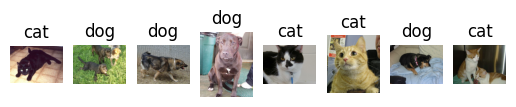

In [ ]:
classNames = ['cat', 'dog']
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

These lines define the desired dimensions for the images (128x128 pixels) and the batch size for training and testing data.

In [ ]:
# Set image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 32

In [ ]:
def preprocess(img, label):
    return tf.image.resize(img, [img_height, img_width]) / 255, label

The trainDataset and testDataset are preprocessed and batched. It appears that there's a missing preprocess function here that should preprocess the images, resize them to (img_height, img_width), and normalize the pixel values. This code maps the preprocess function to each element of the dataset and then batches the data with the specified batch size.

In [ ]:
train_data = trainDataset.map(preprocess).batch(batch_size)
testDataset = testDataset.map(preprocess).batch(batch_size)

Here, a sequential CNN model is defined using Keras layers. The model starts with three convolutional layers, each followed by max-pooling layers for downsampling. The last convolutional layer is followed by a flatten layer to convert the 2D feature maps into a 1D vector. Then, there are two fully connected (dense) layers: one with ReLU activation and one with a sigmoid activation for binary classification.
The model is compiled with the Adam optimizer, binary cross-entropy loss (appropriate for binary classification), and accuracy as the evaluation metric.

In [ ]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Cat or Dog
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

The model is trained using the train_data dataset for 10 epochs. Training history (including loss and accuracy) is stored in the history variable.

In [ ]:
# Train the model
history = model.fit(train_data, epochs=10)

Epoch 1/10
509/509 [==============================] - 564s 1s/step - loss: 0.6306 - accuracy: 0.6367
Epoch 2/10
509/509 [==============================] - 569s 1s/step - loss: 0.5054 - accuracy: 0.7519
Epoch 3/10
509/509 [==============================] - 523s 1s/step - loss: 0.4278 - accuracy: 0.8057
Epoch 4/10
509/509 [==============================] - 520s 1s/step - loss: 0.3598 - accuracy: 0.8417
Epoch 5/10
509/509 [==============================] - 513s 1s/step - loss: 0.2927 - accuracy: 0.8751
Epoch 6/10
509/509 [==============================] - 519s 1s/step - loss: 0.2347 - accuracy: 0.9021
Epoch 7/10
509/509 [==============================] - 520s 1s/step - loss: 0.1763 - accuracy: 0.9283
Epoch 8/10
509/509 [==============================] - 520s 1s/step - loss: 0.1448 - accuracy: 0.9426
Epoch 9/10
509/509 [==============================] - 522s 1s/step - loss: 0.1204 - accuracy: 0.9533
Epoch 10/10
509/509 [==============================] - 523s 1s/step - loss: 0.0944 - accura

The model's performance is evaluated on the testDataset, and the loss and accuracy metrics are printed.
The trained model is saved to a file named 'model.h5'.

In [ ]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

model.save('model.h5')

219/219 [==============================] - 73s 329ms/step - loss: 0.9665 - accuracy: 0.7917
0.9665020704269409
0.791660726070404


Finally, the code predicts the labels for the first 8 images in the test dataset using the trained model. It then generates a similar visualization to the earlier one, but this time it shows the predicted labels based on the model's predictions. The threshold of 0.5 is used to convert the sigmoid output to binary predictions.

8/8 [==============================] - 3s 293ms/step


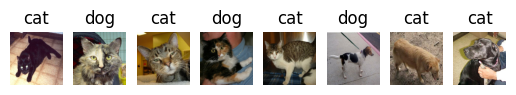

In [ ]:
predictions = model.predict(testDataset.take(8))

i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in testDataset.take(8):
    predictedLabel = int(predictions[i] >= 0.5)

    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel])
    ax[i].imshow(image[0])
    i += 1

plt.show()

## Model architecture:



```python
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
```

This architecture defines a Convolutional Neural Network (CNN) using the Keras Sequential API. The model takes in input images with dimensions `(img_height, img_width, 3)` (where 3 represents the RGB channels).

1. **Convolutional Layer 1 (`Conv2D`):**
   - Filters: 32 filters of size `(3, 3)`
   - Activation: ReLU (Rectified Linear Unit)
   - Input shape: `(img_height, img_width, 3)` (input images)
   - Output shape: `(img_height - 2, img_width - 2, 32)` (due to valid padding)

2. **Max Pooling Layer 1 (`MaxPooling2D`):**
   - Pool size: `(2, 2)`
   - Downsampling: Reduces the spatial dimensions by half
   - Output shape: `(img_height / 2 - 1, img_width / 2 - 1, 32)`

3. **Convolutional Layer 2 (`Conv2D`):**
   - Filters: 64 filters of size `(3, 3)`
   - Activation: ReLU
   - Output shape: `(img_height / 2 - 3, img_width / 2 - 3, 64)`

4. **Max Pooling Layer 2 (`MaxPooling2D`):**
   - Pool size: `(2, 2)`
   - Output shape: `(img_height / 4 - 3, img_width / 4 - 3, 64)`

5. **Convolutional Layer 3 (`Conv2D`):**
   - Filters: 128 filters of size `(3, 3)`
   - Activation: ReLU
   - Output shape: `(img_height / 4 - 5, img_width / 4 - 5, 128)`

6. **Max Pooling Layer 3 (`MaxPooling2D`):**
   - Pool size: `(2, 2)`
   - Output shape: `(img_height / 8 - 5, img_width / 8 - 5, 128)`

7. **Flatten Layer (`Flatten`):**
   - Flattens the 3D tensor to a 1D vector
   - Output shape: `(flattened_size,)`

8. **Dense Layer 1 (`Dense`):**
   - Units: 128 units
   - Activation: ReLU
   - Output shape: `(128,)`

9. **Dense Layer 2 (`Dense`):**
   - Units: 1 unit
   - Activation: Sigmoid
   - Output shape: `(1,)`

The architecture consists of three pairs of Convolutional and Max Pooling layers, which help extract hierarchical features from the input images. The feature maps' dimensions decrease as we move deeper into the network due to the pooling layers, and then the flattened vector is passed through fully connected layers for classification. The final output layer uses a sigmoid activation for binary classification (cat or dog).

It's important to note that the exact spatial dimensions of the feature maps at each layer depend on the input image size (`img_height` and `img_width`) and the specific padding used in the convolutional layers. Also, the choice of the number of filters and units in the dense layers can be adjusted based on the complexity of the problem and available computational resources.